In [1]:
import pandas as pd  #To work with dataframes
import numpy as np   #To perform numerical observations

#For Data Visualisation
import matplotlib    
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Importing the data
data = pd.read_excel('market_campaigns.xlsx', na_values=["'-"])

# Exploratory Data Analysis

In [5]:
#DATA SHAPE:
row, columns = data.shape
print("Data Row:", row)
print("Data Columns:", columns)

Data Row: 16834
Data Columns: 16


In [3]:
#To check variables' data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         1733 non-null   object        
 8   creative_type         1733 non-null   object        
 9   creative_name         1733 non-null   object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null  float64       
 13  impressions     

In [4]:
#Checking for any missing values
print(data.isnull().sum())

Date                        0
product                     0
phase                       0
campaign_platform           0
campaign_type               0
communication_medium        0
subchannel                  0
audience_type           15101
creative_type           15101
creative_name           15101
device                      0
age                         0
spends                      0
impressions                 0
clicks                      0
link_clicks               546
dtype: int64


The dataset cointains missing values in 4 columns, auidence_type, creative_type, creative_name & link_clicks.
Since in the first 3 columns the missing data is so huge, it wont help us in any analysis or prediction for the data.

In [6]:
#Summary of numerical data
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [7]:
#Summary of categorical data
data.describe(include='O')

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age
count,16834,16834,16834,16834,16834,16834,1733,1733,1733,16834,16834
unique,1,1,2,2,2,4,3,2,3,4,7
top,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Audience 1,Image,Click,Mobile,25-34
freq,16834,16834,15101,15101,15101,7853,813,1130,644,7357,3097


From this we can infer that "Google Ads" is the preferred platform and "Mobile" is the most popular device and the maximum ads are consumed by young adults in "25-34" age.

In [53]:
correlation=data.corr()
print(correlation)

               spends  impressions    clicks  link_clicks
spends       1.000000     0.744552  0.838371     0.697201
impressions  0.744552     1.000000  0.917512     0.963108
clicks       0.838371     0.917512  1.000000     0.925588
link_clicks  0.697201     0.963108  0.925588     1.000000


clicks is heavily dependent on all the numerical variables.

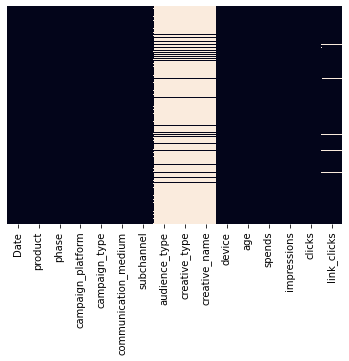

In [62]:
#Heatmap of missing values
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

In [13]:
# Count of each type in the data set to find which is more popular

In [14]:
count_of_device=pd.crosstab(index=data['device'],columns='count')
print(count_of_device)

col_0    count
device        
Desktop   6318
Mobile    7357
Tablet    1426
device    1733


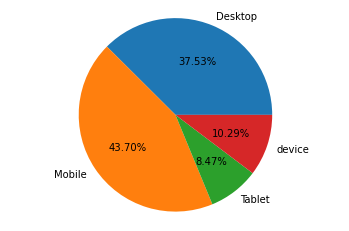

In [20]:
#Visualisation of Devices' ratio
fig= plt.figure()
devices =['Desktop', 'Mobile', 'Tablet', 'device']
plt.pie(count_of_device['count'], labels = devices,autopct='%1.2f%%')
plt.axis('equal')
plt.show()

As ads are maximum seen on mobile screen, this means all ads should be made compartible to mobile screen.

In [15]:
count_of_campaign_platform=pd.crosstab(index=data['campaign_platform'],columns='count')
print(count_of_campaign_platform)

col_0              count
campaign_platform       
Facebook Ads        1733
Google Ads         15101


In [16]:
count_of_campaign_type=pd.crosstab(index=data['campaign_type'],columns='count')
print(count_of_campaign_type)

col_0          count
campaign_type       
Conversions     1733
Search         15101


In [17]:
count_of_communication_medium=pd.crosstab(index=data['communication_medium'],columns='count')
print(count_of_communication_medium)

col_0                 count
communication_medium       
Creative               1733
Search Keywords       15101


In [18]:
count_of_age=pd.crosstab(index=data['age'],columns='count')
print(count_of_age)

col_0         count
age                
18-24          2472
25-34          3097
35-44          2865
45-54          2499
55-64          1757
65 or more     1558
Undetermined   2586


age                18-24  25-34  35-44  45-54  55-64  65 or more  Undetermined
campaign_platform                                                             
Facebook Ads           0    488    485    477    283           0             0
Google Ads          2472   2609   2380   2022   1474        1558          2586


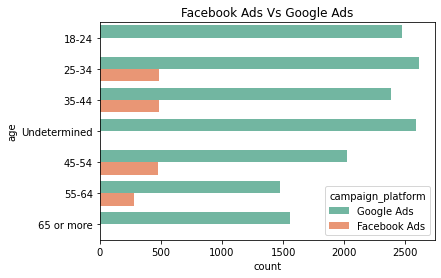

In [23]:
platform_age=pd.crosstab(index=data['campaign_platform'],columns=data['age'],dropna=True)
print(platform_age)

#Bar Plot
plt.figure()
plt.title("Facebook Ads Vs Google Ads")
sns.countplot(y='age', data=data, hue='campaign_platform',palette = "Set2")

Google Ads are more viewed/clicked than Facebook Ads. People from age group of 18-24 and 65 or more dont use Facebook at all.

In [68]:
count_of_audience_type=pd.crosstab(index=data['audience_type'],columns='count',dropna=True)
print(count_of_audience_type)

col_0          count
audience_type       
Audience 1       813
Audience 2       738
Audience 3       182


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C39467D3D0>,
      dtype=object)

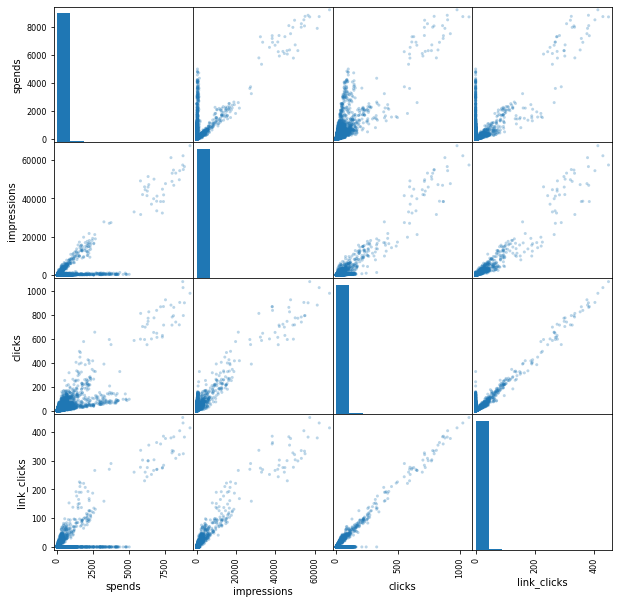

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['spends', 'impressions','clicks', 'link_clicks']],
    alpha=0.3, figsize=(10,10))

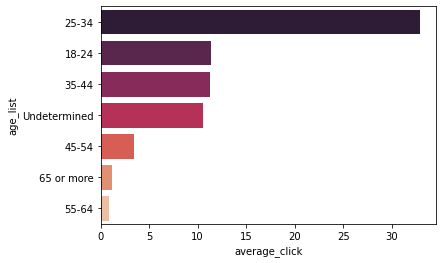

In [35]:
age_list=list(data.age.unique())
average_click=[]

for i in age_list:
    x=data[data.age==i]
    click_average=sum(x.clicks)/len(x)
    average_click.append(click_average)

df1=pd.DataFrame({'age_list':age_list,'average_click':average_click})
new_index=df1.average_click.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
ax=sns.barplot(y=sorted_data.age_list,x=sorted_data.average_click,palette='rocket')

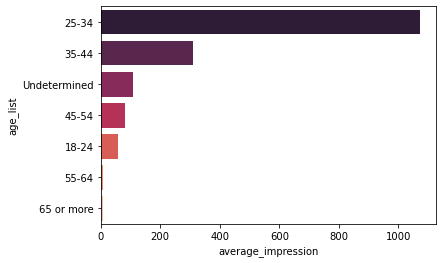

In [37]:
age_list=list(data.age.unique())
average_impression=[]

for i in age_list:
    x=data[data.age==i]
    i_average=sum(x.impressions)/len(x)
    average_impression.append(i_average)

df1=pd.DataFrame({'age_list':age_list,'average_impression':average_impression})
new_index=df1.average_impression.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
ax=sns.barplot(y=sorted_data.age_list,x=sorted_data.average_impression,palette='rocket')

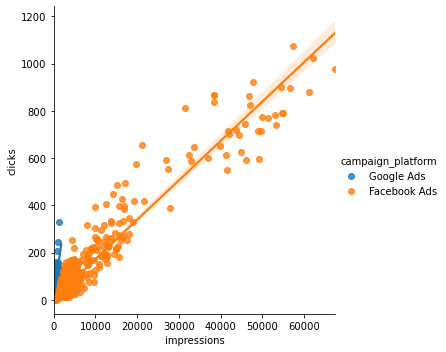

In [69]:
sns.lmplot(x='impressions',y='clicks', data=data, hue='campaign_platform')

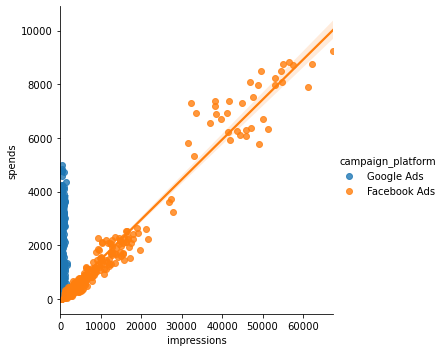

In [70]:
sns.lmplot(x='impressions',y='spends', data=data, hue='campaign_platform')

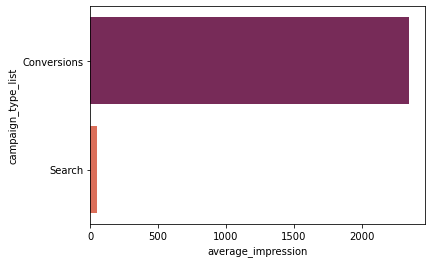

In [39]:
campaign_type_list=list(data.campaign_type.unique())
average_impression=[]

for i in campaign_type_list:
    x=data[data.campaign_type==i]
    i_average=sum(x.impressions)/len(x)
    average_impression.append(i_average)

df1=pd.DataFrame({'campaign_type_list':campaign_type_list,'average_impression':average_impression})
new_index=df1.average_impression.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)
ax=sns.barplot(y=sorted_data.campaign_type_list,x=sorted_data.average_impression,palette='rocket')

# MACHINE LEARNING MODEL

In [40]:
#Making a copy
data1=data.copy(deep=True)

# % of null values
miss_val_per=data1.isnull().mean()*100
print(miss_val_per)

Date                     0.000000
product                  0.000000
phase                    0.000000
campaign_platform        0.000000
campaign_type            0.000000
communication_medium     0.000000
subchannel               0.000000
audience_type           89.705358
creative_type           89.705358
creative_name           89.705358
device                   0.000000
age                      0.000000
spends                   0.000000
impressions              0.000000
clicks                   0.000000
link_clicks              3.243436
dtype: float64


The columns with 90% data missing is of no use in building the model, hence the best option is to remove them.

In [41]:
drop_var=['age','Date','audience_type' ,'creative_type', 'creative_name','product', 'phase']
data1.drop(columns=drop_var, axis=1,inplace=True)  #Removing colums not required for ML

#Filling missing values with mean
data1['link_clicks'].fillna(data['link_clicks'].mean(), inplace=True)

Once the dataset is processed, we need to divide it into two parts: training and test set. We will import and use the train_test_split function for that. All variables except 'clicks' will be the input values X for the ML models. The variable 'clicks' will be stored in y, and will represent the prediction variable. We arbitrarily chose to allocate 33% of the total data for the training set.

In [42]:
# Dataset excluding the target value
X = data1.drop('clicks',axis=1)
# List of target value
y = data1['clicks']
X.head()

,campaign_platform,campaign_type,communication_medium,subchannel,device,spends,impressions,link_clicks
0,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,2,0.0
1,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,5,0.0
2,Google Ads,Search,Search Keywords,Brand,Desktop,0.00,1,0.0
3,Google Ads,Search,Search Keywords,Brand,Desktop,14.63,5,0.0
4,Google Ads,Search,Search Keywords,Brand,Desktop,53.31,10,0.0


In [43]:
#Converting categorical variables into numeric variables for Logistic Regression
dummy_df=pd.get_dummies(X)
dummy_df.head()


,spends,impressions,link_clicks,campaign_platform_Facebook Ads,campaign_platform_Google Ads,campaign_type_Conversions,campaign_type_Search,communication_medium_Creative,communication_medium_Search Keywords,subchannel_Brand,subchannel_Competitor,subchannel_Facebook Ads,subchannel_Generic,device_Desktop,device_Mobile,device_Tablet,device_device
0,0.00,2,0.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0
1,0.00,5,0.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0
2,0.00,1,0.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0
3,14.63,5,0.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0
4,53.31,10,0.0,0,1,0,1,0,1,1,0,0,0,1,0,0,0


In [44]:
# Selecting n-1 columns of each variables of dummy data
Z=pd.get_dummies(X, drop_first=True)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.33, random_state=0)



The first model we will import will be a Logistic Regression model. First, it is necessary to load the LogisticRegression function from the sklearn.linear_model library. Also, we will load the accuracy_score to evaluate the classification performances of the model.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


The next steps are the initialization of the model, it's training, and finally, making predictions.

In [49]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
predictions_LR = model1.predict(X_test)


KeyboardInterrupt



In [48]:
print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))


Logistic regression accuracy: 0.39182865370770337


In [50]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
predictions_DT = model2.predict(X_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))


Logistic regression accuracy: 0.39182865370770337

Confusion Matrix:
[[1502  220   48 ...    0    0    0]
 [  20  670  462 ...    0    0    0]
 [   0    1    5 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


# K MEANS CLUSTERING

Feature selection for the model
Considering only 2 features (spends and impressions) 

In [55]:
X = data[['spends', 'impressions']]

In [56]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow method
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ calculation
from sklearn.cluster import KMeans
wcss=[]

In [57]:
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters    

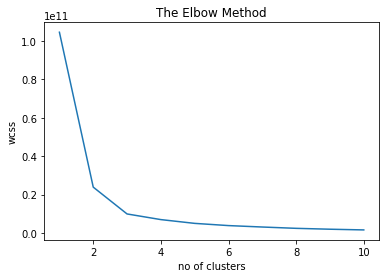

In [58]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [59]:
#If you zoom out this curve then you will see that last elbow comes at k=3
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=3

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.

In [60]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[4.27905016e+01 3.09422318e+01]
 [6.81122772e+03 4.60161765e+04]
 [2.06237465e+03 1.63309697e+04]
 [6.25525831e+02 5.27881707e+03]
 [5.88905897e+03 3.37201667e+04]
 [2.88829448e+03 5.08251748e+02]
 [3.06422263e+02 2.36229661e+03]
 [8.49680563e+03 5.75378000e+04]
 [5.16195799e+02 2.88356474e+02]
 [1.47624575e+03 1.04727143e+04]]
[0 0 0 ... 0 0 0]


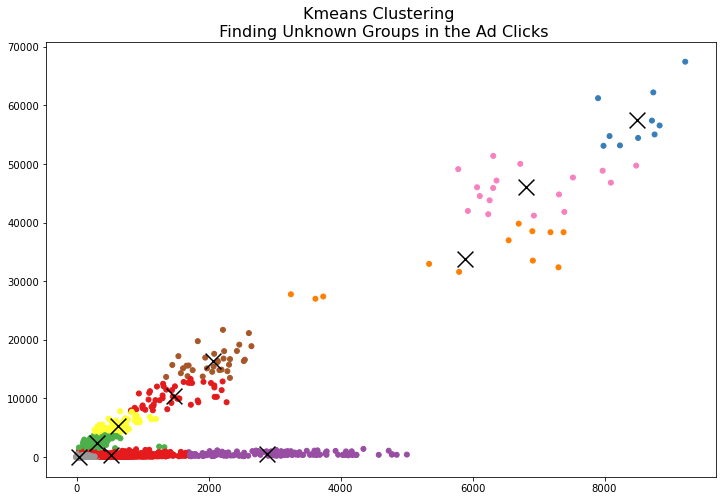

In [61]:
#Visualizing all the clusters 

fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Ad Clicks", fontsize=16)
plt.show()

